### Problem Statement 1

1.	Build a K-means model.
1.	Import wine dataset (from sklearn.datasets import load_wine)
2.	Build a KMeans model with 3 clusters(2 marks)
3.	Make a scatter plot with two features and colour it according to the labels.(2 marks)


In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.datasets import load_wine

In [2]:
df=load_wine()
df

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [70]:
wine=pd.DataFrame(df.data,columns=['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'])
wine.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

In [71]:

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
wine1 = sc.fit_transform(wine)
wine1

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [73]:

wine2=pd.DataFrame(wine1,columns=['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'])
type(wine1)
wine2.head()

alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.251717  0.362177                      1.847920  1.013009  
1        -0.293321  0.406051                      1.113449  0.965242  
2         0.269020  0.318304                      0.788587  1.395148  
3         1.186068 -0.427544                      1.184071  2.334574  
4        -0.319276  0.362177                      0.449601 -0.037874

In [74]:
#library for kmeans
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn import metrics

In [75]:
## Build a KMeans model with 3 clusters
kmeans = cluster.KMeans(n_clusters=3,random_state=0)
kmeans.fit(wine2)

centroids = kmeans.cluster_centers_

print(centroids)

labels = kmeans.predict(wine2)

print(labels)

[[ 0.16490746  0.87154706  0.18689833  0.52436746 -0.07547277 -0.97933029
  -1.21524764  0.72606354 -0.77970639  0.94153874 -1.16478865 -1.29241163
  -0.40708796]
 [-0.93900326 -0.39196582 -0.43920097  0.20898793 -0.46377382 -0.05334831
   0.06690377 -0.01982215  0.06479192 -0.88207529  0.45298189  0.28973833
  -0.75602559]
 [ 0.87809728 -0.30457633  0.31894179 -0.66452366  0.56488825  0.87650546
   0.94363903 -0.58558981  0.58178294  0.16718842  0.48372814  0.76705349
   1.15834713]]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [76]:
wine2.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

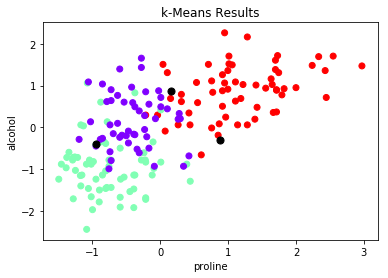

In [86]:
## Make a scatter plot with two features and colour it according to the labels

plt.title('k-Means Results')
plt.xlabel('proline')
plt.ylabel('alcohol')

plt.scatter(wine2['proline'], wine2['alcohol'], c= kmeans.labels_.astype(float), cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'black', label = 'Centroids')
plt.show()

### Problem Statement 2

1.	Load digits dataset from sklearn datasets.
2.	Build Kmeans clustering model and the optimal K. Write Observations.(4 marks)
3.	Perform dimentionality reduction and find the number principal components required to explain 60% variance and 85% variance. Write observations(4 marks)


In [49]:
from sklearn.datasets import load_digits

In [139]:
dat=load_digits()
dat

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [140]:
digits=pd.DataFrame(dat.data)
digits.head()

0    1    2     3     4     5    6    7    8    9  ...    54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0 ...   5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0 ...   9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]

In [176]:
target=pd.DataFrame(dat.target)
target.nunique()
target.shape

(1797, 1)

In [141]:
digits.shape

(1797, 64)

In [142]:
#library for kmeans
from sklearn.cluster import KMeans

In [143]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1 = sc.fit_transform(digits[300:])
x1

array([[ 0.        , -0.33059472, -0.89794077, ..., -1.15035239,
        -0.51292153, -0.21320998],
       [ 0.        , -0.33059472,  0.38736664, ...,  1.0468218 ,
        -0.04127317, -0.21320998],
       [ 0.        , -0.33059472,  0.17314874, ..., -0.98133899,
        -0.51292153, -0.21320998],
       ...,
       [ 0.        , -0.33059472, -0.89794077, ..., -0.13627199,
        -0.51292153, -0.21320998],
       [ 0.        , -0.33059472, -0.68372287, ...,  0.8778084 ,
        -0.51292153, -0.21320998],
       [ 0.        , -0.33059472,  1.03002034, ...,  0.8778084 ,
        -0.27709735, -0.21320998]])

In [209]:
len(target[300:])

1497

In [144]:
x=pd.DataFrame(x1)

x.head()

0         1         2         3         4         5         6        7   \
0  0.0 -0.330595 -0.897941 -0.247750  0.955002  1.781206  2.471056 -0.13166   
1  0.0 -0.330595  0.387367  0.736674  0.955002  1.080197 -0.417793 -0.13166   
2  0.0 -0.330595  0.173149  0.490568  0.488486  1.255449  2.759941 -0.13166   
3  0.0 -0.330595 -1.112159 -0.493856  0.255228 -1.022833 -0.417793 -0.13166   
4  0.0 -0.330595 -0.683723  0.244462 -0.444546 -0.497075 -0.417793 -0.13166   

        8         9    ...           54        55        56        57  \
0 -0.06475 -0.632804   ...    -0.779106 -0.223004 -0.025854 -0.285552   
1 -0.06475  0.578587   ...     0.829614 -0.223004 -0.025854 -0.285552   
2 -0.06475 -0.632804   ...    -0.779106 -0.223004 -0.025854 -0.285552   
3 -0.06475 -0.632804   ...    -0.779106 -0.223004 -0.025854 -0.285552   
4 -0.06475 -0.632804   ...     0.226344 -0.223004 -0.025854 -0.285552   

         58        59        60        61        62       63  
0 -1.097197  0.175675 -1.804022 -1.150352 -0.512922 -0.21321  
1  0.291897  0.882624  0.832907  1.046822 -0.041273 -0.21321  
2  0.291897  0.411324 -0.181296 -0.981339 -0.512922 -0.21321  
3 -0.898755 -1.709523 -0.992659  1.384849  1.373672 -0.21321  
4 -0.104987  0.411324  0.224385  0.201755 -0.277097 -0.21321  

[5 rows x 64 columns]

In [145]:
kmeans=KMeans(random_state=0).fit(x) #give scaled data as Input
centroids=kmeans.cluster_centers_
print(centroids)  #centroid

label=kmeans.labels_
print(label)

[[ 0.00000000e+00 -3.30594718e-01 -1.00933408e+00 -1.29124001e+00
   7.79520586e-02  4.70318122e-01  2.11283895e+00  4.47961985e+00
  -6.47496760e-02 -6.32803812e-01 -1.16272411e+00  6.00438114e-01
  -2.07087168e-01 -4.66320466e-01  2.82486713e+00  6.27403731e+00
  -4.89022404e-02 -6.35839310e-01  2.00506878e-03  4.14059704e-01
  -8.76102407e-01 -1.53509020e-01  3.68328138e+00  5.88639042e+00
  -2.58543845e-02  3.39828259e-02  5.37179392e-01 -5.50732979e-02
  -3.84041674e-01  1.13481606e+00  1.97169477e+00  3.04766967e+00
   0.00000000e+00  2.61091185e-01  4.56467420e-01  1.68625416e-02
   8.38402951e-02  8.98014013e-01  1.22814311e-01  0.00000000e+00
   4.36020273e-01 -8.80030618e-02 -5.80246646e-01 -5.08125349e-01
   6.25566366e-01  1.16330878e-01 -6.97506470e-01 -9.55830206e-02
   1.39190234e+00 -4.96994728e-02 -1.22654793e+00 -7.61856621e-01
   7.00090114e-01 -8.27151947e-01 -7.79106088e-01 -2.23004028e-01
  -2.58543845e-02 -2.85552087e-01 -1.04163332e+00 -8.04627870e-01
  -4.65273

In [167]:
## Elbow test
cluster_range = range(1,15)
cluster_errors=[]

for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(x)
    cluster_errors.append(clusters.inertia_)

In [168]:
clusters_df=pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df[0:5]

num_clusters  cluster_errors
0             1    91317.000000
1             2    83373.242816
2             3    77780.648285
3             4    73950.264551
4             5    70421.773947

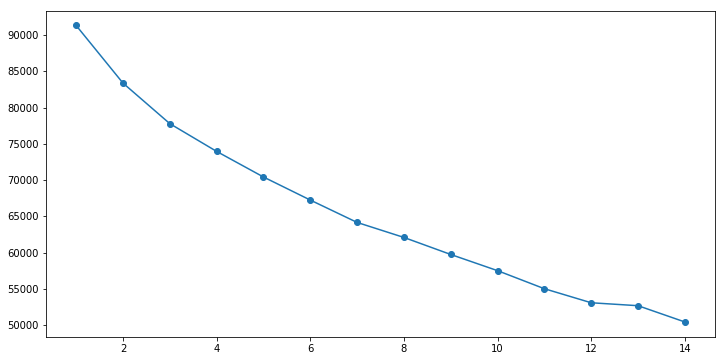

In [169]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors,marker='o')
plt.show()

In [260]:
#Using cluster size to be 10

kmeans=KMeans(n_clusters=10,random_state=0).fit(x) #give scaled data as Input
centroids=kmeans.cluster_centers_
print(centroids)  #centroid

label=kmeans.labels_
print(label)

[[ 0.00000000e+00 -3.30594718e-01 -8.57070247e-01 -1.71651505e-01
  -5.42759328e-01 -7.34588635e-01 -4.08290001e-01 -1.31660004e-01
  -6.47496760e-02 -6.12879627e-01 -6.24327056e-01  6.39760169e-01
  -7.99387062e-01 -1.15800762e+00 -4.99067240e-01 -1.37778364e-01
  -4.89022404e-02 -5.11035757e-01  4.40812622e-01  3.88667268e-01
  -9.96884071e-01 -1.21098640e+00 -5.43275126e-01 -1.24074865e-01
  -2.58543845e-02 -1.23097416e-02  7.42163763e-01 -1.41866146e-01
  -9.16276395e-01 -8.69986791e-01 -5.92135983e-01 -5.17606941e-02
   0.00000000e+00  3.79468057e-01  1.13357597e+00  6.21996226e-01
   3.40496322e-01  4.03748013e-01  5.30419579e-02  0.00000000e+00
  -6.72352001e-02  8.03784195e-02  1.18142065e+00  4.74254097e-01
  -4.51804255e-01  2.74703348e-01  1.38320622e+00  7.08501280e-01
  -3.88265609e-02 -3.26434636e-01  4.54578217e-01  5.30079829e-01
  -7.71052708e-01  3.89337741e-01  1.39054883e+00  3.15243222e-01
  -2.58543845e-02 -2.85552087e-01 -8.09978457e-01 -3.26631150e-01
   6.56755

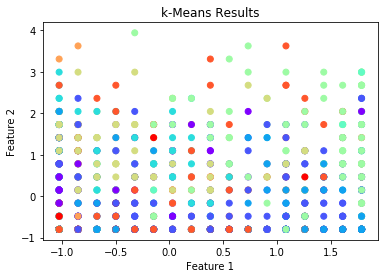

In [174]:
plt.title('k-Means Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.scatter(x[5],x[25], c= kmeans.labels_.astype(float), cmap='rainbow')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'black', label = 'Centroids')
plt.show()

In [234]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,target[300:] , test_size = 0.2, random_state = 0)

In [235]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)


#  test set of Y and predicted value. 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Accuracy : ' + str(accuracy_score(y_test, y_pred)) )

C:\Users\DELL\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[[33  0  0  0  0  0  0  0  0  0]
 [ 0 27  0  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  1  0]
 [ 0  0  0  0 32  0  1  0  0  0]
 [ 0  0  0  0  0 30  1  0  0  0]
 [ 1  0  0  0  0  0 31  0  0  0]
 [ 0  0  0  0  0  0  1 39  0  0]
 [ 0  2  1  1  0  0  0  0 20  0]
 [ 0  0  0  1  0  0  0  0  0 20]]
Accuracy : 0.9666666666666667


In [236]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
X_train = pca2.fit_transform(X_train)
X_test = pca2.transform(X_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)


#  test set of Y and predicted value. 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Accuracy : ' + str(accuracy_score(y_test, y_pred)) )

[[16  2  0  0  5  0  8  0  0  2]
 [ 0  8  2  0  2  0  1  1  0 13]
 [ 0  1 19  0  0  0  0  0  0  1]
 [ 0  4 20 11  0  0  0  3  0  0]
 [ 1  0  0  0 32  0  0  0  0  0]
 [ 1  7  2  6  0  0  0  5  0 10]
 [ 2  0  0  0  1  0 29  0  0  0]
 [ 0  0  0  3  0  0  0 34  0  3]
 [ 2  6  0  3  0  0  0  1  1 11]
 [ 0  6  2  3  1  1  0  2  1  5]]
Accuracy : 0.5166666666666667


C:\Users\DELL\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [237]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=1)
X_train = pca1.fit_transform(X_train)
X_test = pca1.transform(X_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)


#  test set of Y and predicted value. 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Accuracy : ' + str(accuracy_score(y_test, y_pred)) )

[[ 5  2  0  0  4  0 20  0  0  2]
 [ 3  1  2  1  2  0  1  0  0 17]
 [ 0  0 17  2  0  0  0  0  0  2]
 [ 0  0 25  6  0  0  0  0  0  7]
 [ 1  0  0  0 32  0  0  0  0  0]
 [ 0  4  5  6  1  0  3  0  0 12]
 [ 3  6  0  0  1  0 16  0  0  6]
 [ 2  6  1  2  9  0  8  0  0 12]
 [ 2  0  0  4  0  0  4  0  0 14]
 [ 0  0  2  3  2  0  1  0  0 13]]
Accuracy : 0.3


C:\Users\DELL\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[1.28193284e-01 9.67408844e-02 8.68532933e-02 6.29472889e-02
 5.05978289e-02 4.37131331e-02 4.02650119e-02 3.72448775e-02
 3.58482770e-02 2.96034307e-02 2.79781344e-02 2.53686715e-02
 2.37772164e-02 2.26832100e-02 2.06435634e-02 1.87668100e-02
 1.76410809e-02 1.71402328e-02 1.43000732e-02 1.31606455e-02
 1.28499134e-02 1.14272810e-02 1.04732718e-02 9.62009256e-03
 9.51642572e-03 9.02415530e-03 8.18407867e-03 7.76287730e-03
 7.55991925e-03 7.32138556e-03 7.14885894e-03 6.70691794e-03
 6.30958627e-03 5.41895866e-03 4.79525315e-03 4.57305803e-03
 4.50721664e-03 4.09136531e-03 3.94412669e-03 3.87615348e-03
 3.52479554e-03 3.38728106e-03 3.22412128e-03 3.10072101e-03
 2.93508723e-03 2.72464184e-03 2.68294446e-03 2.27941136e-03
 2.11428762e-03 2.08707958e-03 1.91145847e-03 1.85759957e-03
 1.62782038e-03 1.61849779e-03 1.46926203e-03 1.38313627e-03
 1.26669760e-03 1.02645086e-03 8.68934857e-04 3.31928165e-04
 2.52834448e-32 6.29167893e-34 6.29167893e-34 5.97832390e-34]


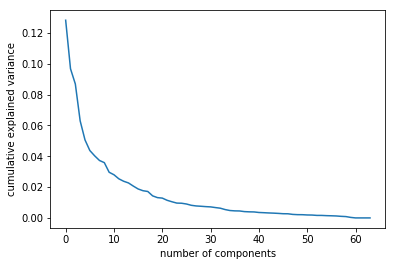

In [239]:
print(pca.explained_variance_ratio_)
#Explained variance
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [258]:
l_85=[]
l_60=[]
z=(pca.explained_variance_ratio_)
for i in z:
    if((i*100)<85):
        l_85.append(i)
    if((i*100)<60):
        l_60.append(i)
    
print('number principal components required to explain 85% variance ',len(l_85))
print('number principal components required to explain 60% variance ',len(l_60))
        

number principal components required to explain 85% variance  64
number principal components required to explain 60% variance  64


### Inference:

* For digits dataset, elbow test doesnot seem to give a good comprehension for cluster analysis. 
* Also, in order to find the principal components using PCA, it is found that all features has to be used in order to get better accuracy.
* From the scree plot for PCA, it is found that the number of components could be 10.
* All the 64 features are required for better accuracy since the variance ratio for all features are less than 60% and 85%